# Student Performance Data Exploration

### Install and import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [2]:
math_data = pd.read_csv(filepath_or_buffer = 'data/student-mat.csv', sep=';', header=0)
port_data = pd.read_csv(filepath_or_buffer = 'data/student-por.csv', sep=';', header=0)

In [3]:
math_data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
port_data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Exploratory questions

- Does the school that the student attended matter?
- Does free time result in better or worse grades?
- Does family stability (parent cohabitation, family size, guardian, family educational support, parent education and employment, quality of family relationships) impact student success?
- Is there a strong correlation between father and mother education? i.e. do students usually have either educated parents or non-educated parents or do many students have one parent who is educated and one who is not educated?
- Does tutoring or outside help indicate the student will be more successful or does it indicate that the student was struggling in school and may continue to struggle?
- Does study time directly correlate to better grades? Could it be possible that the answers to the survey are not completely honest?

### Exploring the data

We will start by looking at the data set as a whole including the number of rows, columns, data types, etc. We will then focus on the target variable, G3, and then explore each of the attributes in the order in which they appear on the UCI dataset web page.

In [5]:
print('Number of rows in math dataset: ', math_data.shape[0])

Number of rows in math dataset:  395


In [6]:
print('Number of rows in Portuguese dataset: ', math_data.shape[1])

Number of rows in Portuguese dataset:  33


In [7]:
print('Number of columns in math dataset: ', math_data.shape[1])

Number of columns in math dataset:  33


In [8]:
print('Number of columns in Portuguese dataset: ', port_data.shape[1])

Number of columns in Portuguese dataset:  33


In [9]:
pd.concat([math_data.dtypes, port_data.dtypes], axis=1, keys=['Math Data Type', 'Portuguese Data Type'])

,Math Data Type,Portuguese Data Type
school,object,object
sex,object,object
age,int64,int64
address,object,object
famsize,object,object
Pstatus,object,object
Medu,int64,int64
Fedu,int64,int64
Mjob,object,object
Fjob,object,object


Thankfully, all of the column names and data types are the same between the two datasets. 

In [10]:
print('Unique values for each column in math dataset: ')
math_data.nunique(axis=0)

Unique values for each column in math dataset: 


school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [11]:
print('Unique values for each column in Portuguese dataset: ')
port_data.nunique(axis=0)

Unique values for each column in Portuguese dataset: 


school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64

### Target variable:

In [12]:
math_data.G3.describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [13]:
port_data.G3.describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

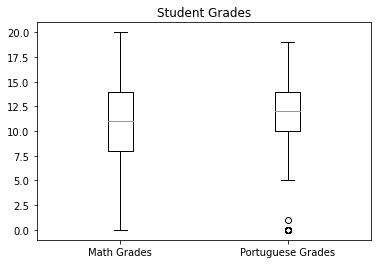

In [14]:
plt.title('Student Grades')
plt.boxplot(x = [math_data.G3, port_data.G3], labels = ['Math Grades', 'Portuguese Grades'])
plt.show()

We can see that there are several outliers for the Portuguese grades with a grade of between 0 and 2. We believe that these data points were not mistakes. These may represent students who did not participate or turn in assignment. They could also represent students who are having trouble in their personal lives, which may be shown in the quality of family relationship statistics or parent cohabitation.

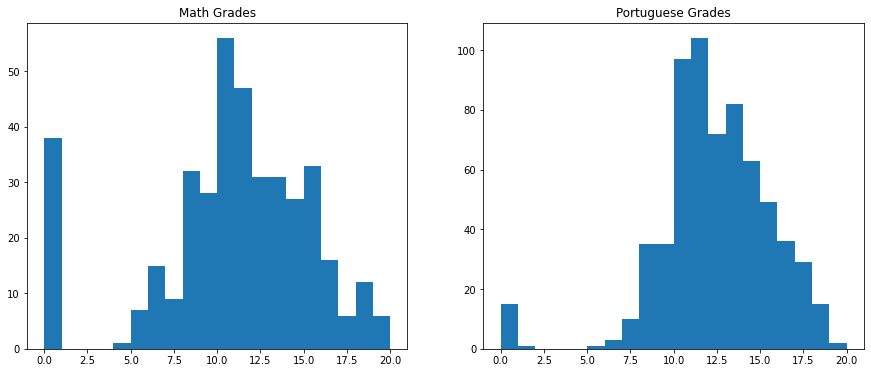

In [15]:
plt.rcParams['figure.figsize'] = [15, 6]
bins = [*range(21)]
plt.subplot(1, 2, 1)
plt.title('Math Grades')
plt.hist(math_data.G3, bins = bins)
plt.subplot(1, 2, 2)
plt.title('Portuguese Grades')
plt.hist(port_data.G3, bins = bins)
plt.show()

The distribution of grades looks relatively similar for both subjects. Both distributions look relatively normal. There are a number of students for both subjects who received a grade of zero or one but very few received between a one and a five. 

We will combine the two datasets for the following analysis since we will be modeling using the combined dataset.

In [16]:
df = pd.concat([math_data, port_data])

### Missing values

In [17]:
df.isna().any().sum()

0

The dataset does not contain any missing values.

### Attributes

For each attribute, we'll inspect the distribution of the data, any outliers that may exist, and the correlation between that attribute and the target variable, G3. We understand that correlation is not a great metric for nominal and binary attributes but it does give us a relative sense of the impact that attribute might have on the target variable.

In [108]:
# create copied dataframe to manipulate
df_corr = df.copy()

#### School

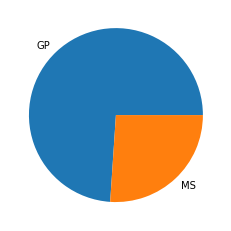

In [19]:
plt.rcParams['figure.figsize'] = [5, 4]
school_counts = df_corr['school'].value_counts()
plt.pie(school_counts, normalize=True, labels = school_counts.index)
plt.show()

In [20]:
df_corr['school'] = df_corr['school'].astype('category').cat.codes
school_corr = df_corr[['school', 'G3']].corr()['G3'].loc['school']
print('Correlation between school and final grade: ', school_corr)

Correlation between school and final grade:  -0.1271139292906205


There is no statistical significance in the correlation between school and final grade. This is good, we want our model to be able to generalize beyond the two schools included in the survey and not base its results on which of the two schools has better grades. We plan on dropping this column.

#### Sex

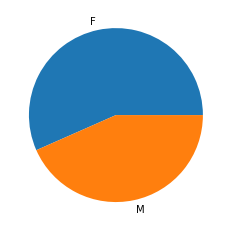

In [21]:
plt.rcParams['figure.figsize'] = [5, 4]
sex_counts = df_corr['sex'].value_counts()
plt.pie(sex_counts, normalize=True, labels = sex_counts.index)
plt.show()

In [22]:
df_corr['sex'] = df_corr['sex'].astype('category').cat.codes
sex_corr = df_corr[['sex', 'G3']].corr()['G3'].loc['sex']
print('Correlation between sex and final grade: ', sex_corr)

Correlation between sex and final grade:  -0.03147205182217906


There is essentially no correlation between sex and grades. This attribute may just add noise to the dataset. 

#### Age

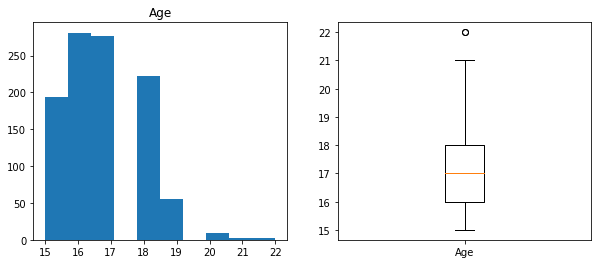

In [23]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.subplot(1, 2, 1)
plt.title('Age')
plt.hist(df_corr['age'])
plt.subplot(1, 2, 2)
plt.boxplot(df_corr['age'], labels=['Age'])
plt.show()

Most of the students in the study were between the age of 15-19, a normal range for high school in the United States, which seems reasonable. There was one outlier who was a 22 year-old and a few students who were 20-21 years-old. This still seems relatively plausable since students sometimes get held back or must repeat a year in school if they are struggling. 

In [117]:
age_corr = df_corr[['age', 'G3']].corr()['G3'].loc['age']
print('Correlation between age and final grade: ', age_corr)

Correlation between age and final grade:  -0.12528243256718025


We see a very weak negative correlation between age and final grade. This is not surprising given that older students, particularily those over the age of 20, were most likely held back due to poor grades.

#### Address

'U' for urban, 'R' for rural

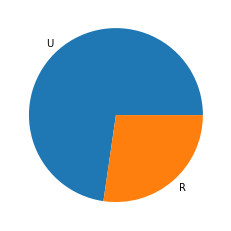

In [25]:
plt.rcParams['figure.figsize'] = [5, 4]
address_counts = df_corr['address'].value_counts()
plt.pie(address_counts, normalize=True, labels = address_counts.index)
plt.show()

In [26]:
df_corr['address'] = df_corr['address'].astype('category').cat.codes
address_corr = df_corr[['address', 'G3']].corr()['G3'].loc['address']
print('Correlation between address type and final grade: ', address_corr)

Correlation between address type and final grade:  0.11769555959834824


#### Family size

'LE3' - less or equal to 3 or 'GT3' - greater than 3

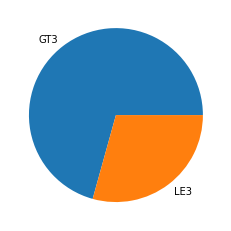

In [27]:
plt.rcParams['figure.figsize'] = [5, 4]
famsize_counts = df_corr['famsize'].value_counts()
plt.pie(famsize_counts, normalize=True, labels = famsize_counts.index)
plt.show()

In [28]:
df_corr['famsize'] = df_corr['famsize'].astype('category').cat.codes
famsize_corr = df_corr[['famsize', 'G3']].corr()['G3'].loc['famsize']
print('Correlation between family size and final grade: ', famsize_corr)

Correlation between family size and final grade:  0.0612085900248791


#### Parent's cohabition status

'T' - living together or 'A' - apart

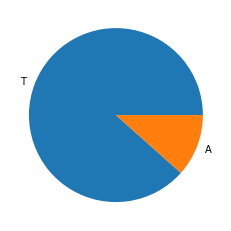

In [29]:
plt.rcParams['figure.figsize'] = [5, 4]
pstatus_counts = df_corr['Pstatus'].value_counts()
plt.pie(pstatus_counts, normalize=True, labels = pstatus_counts.index)
plt.show()

In [30]:
df_corr['Pstatus'] = df_corr['Pstatus'].astype('category').cat.codes
pstatus_corr = df_corr[['Pstatus', 'G3']].corr()['G3'].loc['Pstatus']
print('Correlation between parent\'s cohabitation status and final grade: ', pstatus_corr)

Correlation between parent's cohabitation status and final grade:  -0.030693155107326446


This is surprising. There is almost no correlation between parent cohabitation and student success. 

#### Mother education

0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education

Education is an ordinal variable because there is a "greater than" and "less than" relationship between the levels of education and each successive level indicates an increase in the education level of the parent.

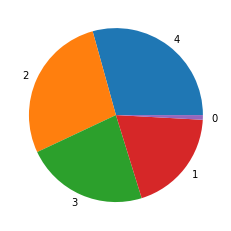

In [109]:
plt.rcParams['figure.figsize'] = [5, 4]
medu_counts = df_corr['Medu'].value_counts()
plt.pie(medu_counts, normalize=True, labels = medu_counts.index)
plt.show()

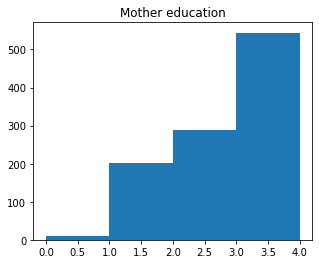

In [110]:
plt.title('Mother education')
plt.hist(df_corr['Medu'], bins = [*range(5)])
plt.show()

The distribution of the mother education attribute appears to be non-Gaussian. Therefore, we will calculate the Spearman correlation between this attribute and final grade.

In [112]:
medu_corr = df_corr[['Medu', 'G3']].corr(method='spearman')['G3'].loc['Medu']
print('Correlation between mother education and final grade: ', medu_corr)

Correlation between mother education and final grade:  0.23831196704003327


There is actually a small positive correlation between mother education and the student's grade. This may be because educated mothers are more likely to pass on the importance of education to their children. 

#### Father education

0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education

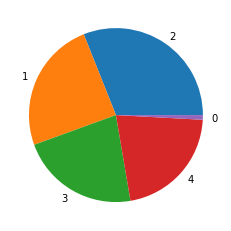

In [113]:
plt.rcParams['figure.figsize'] = [5, 4]
fedu_counts = df_corr['Fedu'].value_counts()
plt.pie(fedu_counts, normalize=True, labels = fedu_counts.index)
plt.show()

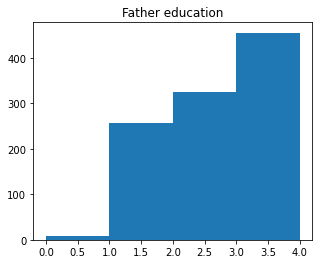

In [114]:
plt.title('Father education')
plt.hist(df_corr['Fedu'], bins = [*range(5)])
plt.show()

The distribution of the father education attribute appears to be non-Gaussian. Therefore, we will calculate the Spearman correlation between this attribute and final grade.

In [115]:
fedu_corr = df_corr[['Fedu', 'G3']].corr(method='spearman')['G3'].loc['Fedu']
print('Correlation between father education and final grade: ', fedu_corr)

Correlation between father education and final grade:  0.1899537317722802


There is a slightly smaller correlation with father education than there was with mother education. This may indicate that mothers have more of an impact on their children's education. 

#### Mother's job

'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other'

This is a nominal variable since there is no "greater than" or "less than" relationship between the categories. Correlation does not make much sense here. Instead, we will look at the average grade for students who fall into each category and plot the result.

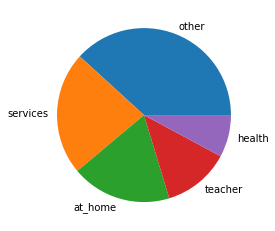

In [37]:
plt.rcParams['figure.figsize'] = [5, 4]
mjob_counts = df_corr['Mjob'].value_counts()
plt.pie(mjob_counts, normalize=True, labels = mjob_counts.index)
plt.show()

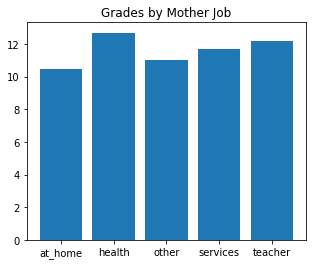

In [38]:
averageGradesByMotherJob = df_corr.groupby(['Mjob']).mean()['G3']
plt.title('Grades by Mother Job')
plt.bar(averageGradesByMotherJob.index, averageGradesByMotherJob)
plt.show()

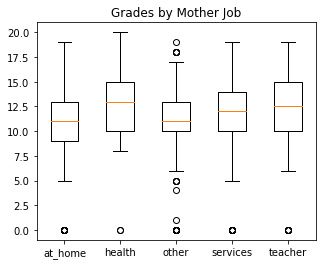

In [39]:
labels = []
plots = []
for job in df_corr['Mjob'].unique():
    labels.append(job)
    plots.append(df_corr[df_corr['Mjob'] == job]['G3'])
plt.title('Grades by Mother Job')
plt.boxplot(plots, labels = labels)
plt.show()

Students whose mother works in the healthcare industry tend to have better grades. Students whose mother is a teacher average slightly lower, with students whose mother is in 'services' in close third. However, there is not a huge difference between the grades for students with mothers in different jobs. There may be a small positive correlation between mothers in the health and teaching industry and good grades.

#### Father's job

'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other'

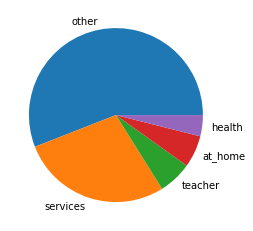

In [40]:
plt.rcParams['figure.figsize'] = [5, 4]
fjob_counts = df_corr['Fjob'].value_counts()
plt.pie(fjob_counts, normalize=True, labels = fjob_counts.index)
plt.show()

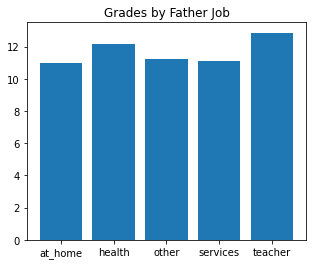

In [41]:
averageGradesByFatherJob = df_corr.groupby(['Fjob']).mean()['G3']
plt.title('Grades by Father Job')
plt.bar(averageGradesByFatherJob.index, averageGradesByFatherJob)
plt.show()

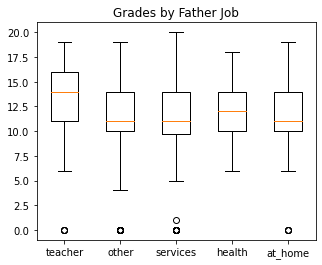

In [42]:
labels = []
plots = []
for job in df_corr['Fjob'].unique():
    labels.append(job)
    plots.append(df_corr[df_corr['Fjob'] == job]['G3'])
plt.title('Grades by Father Job')
plt.boxplot(plots, labels = labels)
plt.show()

Interestingly, students whose father is a teacher do significantly better in school than students whose father is in other industries. There may be a pretty significant correlation between the father being a teacher and the student doing well in school.

#### Reason to choose the school

close to 'home', school 'reputation', 'course' preference or 'other'

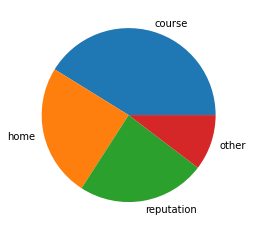

In [43]:
plt.rcParams['figure.figsize'] = [5, 4]
reason_counts = df_corr['reason'].value_counts()
plt.pie(reason_counts, normalize=True, labels = reason_counts.index)
plt.show()

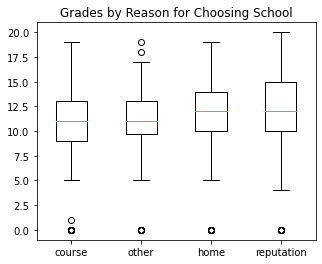

In [44]:
labels = []
plots = []
for job in df_corr['reason'].unique():
    labels.append(job)
    plots.append(df_corr[df_corr['reason'] == job]['G3'])
plt.title('Grades by Reason for Choosing School')
plt.boxplot(plots, labels = labels)
plt.show()

There is not a huge difference between the grades of students with different reasons for choosing to attend their school. 

#### Guardian

'mother', 'father' or 'other'

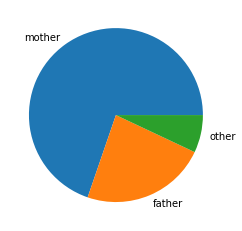

In [45]:
plt.rcParams['figure.figsize'] = [5, 4]
guardian_counts = df_corr['guardian'].value_counts()
plt.pie(guardian_counts, normalize=True, labels = guardian_counts.index)
plt.show()

Interestingly, almost 75% of students listed their mother as their guardian. 

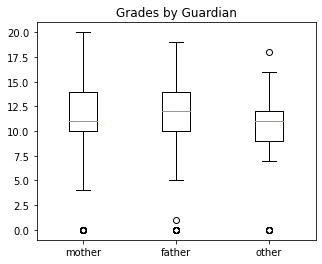

In [46]:
labels = []
plots = []
for job in df_corr['guardian'].unique():
    labels.append(job)
    plots.append(df_corr[df_corr['guardian'] == job]['G3'])
plt.title('Grades by Guardian')
plt.boxplot(plots, labels = labels)
plt.show()

The average grade for students was pretty much the same between students who listed 'mother', 'father', and 'other' as their guardian. However, students who listed 'mother' or 'father' had a higher ceiling. A student who got a grade of ~18 was even considered an outlier for the 'other' category.

#### Travel time

1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour

This is an ordinal variable, so computing correlation makes sense for this attribute.

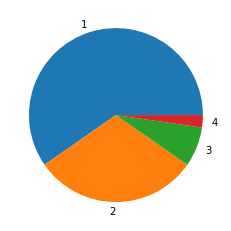

In [98]:
plt.rcParams['figure.figsize'] = [5, 4]
traveltime_counts = df_corr['traveltime'].value_counts()
plt.pie(traveltime_counts, normalize=True, labels = traveltime_counts.index)
plt.show()

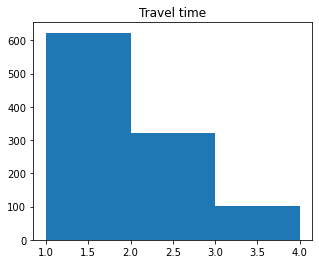

In [99]:
plt.title('Travel time')
plt.hist(df_corr['traveltime'], bins = [*range(1, 5)])
plt.show()

Most of the students live relatively close to the school.

The distribution of the travel time attribute appears to be non-Gaussian. Therefore, we will calculate the Spearman correlation between this attribute and final grade.

In [101]:
traveltime_corr = df_corr[['traveltime', 'G3']].corr(method='spearman')['G3'].loc['traveltime']
print('Correlation between travel time and final grade: ', traveltime_corr)

Correlation between travel time and final grade:  -0.11913802899243023


#### Study time

1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours

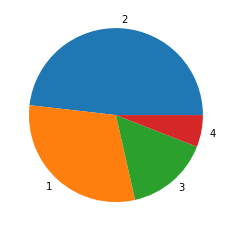

In [102]:
plt.rcParams['figure.figsize'] = [5, 4]
studytime_counts = df_corr['studytime'].value_counts()
plt.pie(studytime_counts, normalize=True, labels = studytime_counts.index)
plt.show()

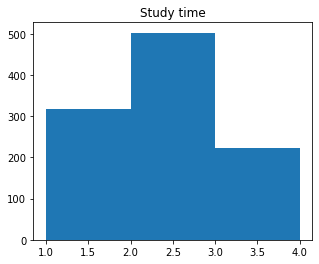

In [103]:
plt.title('Study time')
plt.hist(df_corr['studytime'], bins = [*range(1, 5)])
plt.show()

In [104]:
studytime_corr = df_corr[['studytime', 'G3']].corr()['G3'].loc['studytime']
print('Correlation between study time and final grade: ', studytime_corr)

Correlation between study time and final grade:  0.1616289352029382


There is a weak positive correlation between study time and final grade. We expected there to be a much stronger correlation between these two variables. It may still be a useful indicator of final grade.

#### Past failed classes

n if 1<=n<3, else 4

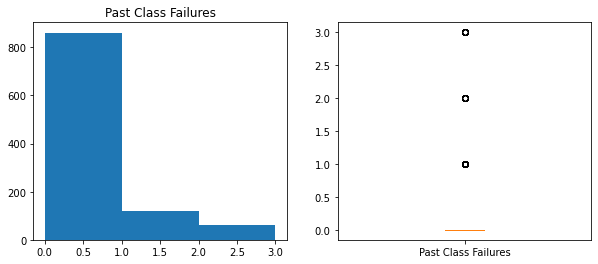

In [84]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.subplot(1, 2, 1)
plt.title('Past Class Failures')
plt.hist(df_corr['failures'], bins=[*range(4)])
plt.subplot(1, 2, 2)
plt.boxplot(df_corr['failures'], labels=['Past Class Failures'])
plt.show()

The distribution of the past failed classes attribute appears to be non-Gaussian. Therefore, we will calculate the Spearman correlation between this attribute and final grade.

In [96]:
fail_corr = df_corr[['failures', 'G3']].corr(method='spearman')['G3'].loc['failures']
print('Correlation between past failed classes and grades: ', fail_corr)

Correlation between past failed classes and grades:  -0.41266035246631894


There is a weak negative correlation between past failed classes and student performance. While the majority of students have never failed a class, this attribute may be a good indicator of future performance.

#### Extra educational support

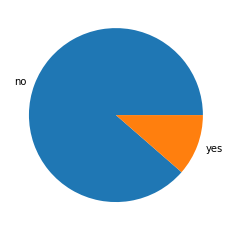

In [58]:
plt.rcParams['figure.figsize'] = [5, 4]
schoolsup_counts = df_corr['schoolsup'].value_counts()
plt.pie(schoolsup_counts, normalize=True, labels = schoolsup_counts.index)
plt.show()

In [59]:
df_corr['schoolsup'] = df_corr['schoolsup'].astype('category').cat.codes
schoolsup_corr = df_corr[['schoolsup', 'G3']].corr()['G3'].loc['schoolsup']
print('Correlation between extra educational support and final grade: ', schoolsup_corr)

Correlation between extra educational support and final grade:  -0.07934621996352752


Surprisingly, there is almost no correlation between extra educational support and student performance. We had predicted that students with this extra support would be more successful but it may actually indicate that the student was struggling before enrolling in these supplemental classes and may continue to struggle. In fact, the correlation is slightly negative. This suggests that the extra educational support attribute may actually introduce noise into the dataset instead of being a good indicator of grades.

#### Family educational support

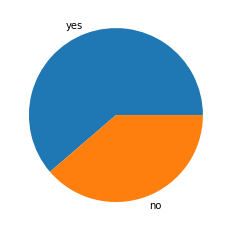

In [63]:
plt.rcParams['figure.figsize'] = [5, 4]
famsup_counts = df_corr['famsup'].value_counts()
plt.pie(famsup_counts, normalize=True, labels = famsup_counts.index)
plt.show()

In [64]:
df_corr['famsup'] = df_corr['famsup'].astype('category').cat.codes
famsup_corr = df_corr[['famsup', 'G3']].corr()['G3'].loc['famsup']
print('Correlation between family educational support and final grade: ', famsup_corr)

Correlation between family educational support and final grade:  0.013312604225917395


Again, we were surprised to see almost no correlation between family educational support and student performance. We had predicted that students whose families helped them in school would be more successful.

#### Extra paid classes

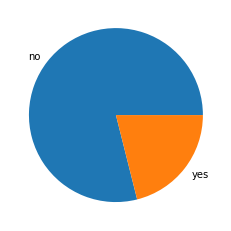

In [65]:
plt.rcParams['figure.figsize'] = [5, 4]
paid_counts = df_corr['paid'].value_counts()
plt.pie(paid_counts, normalize=True, labels = paid_counts.index)
plt.show()

In [66]:
df_corr['paid'] = df_corr['paid'].astype('category').cat.codes
paid_corr = df_corr[['paid', 'G3']].corr()['G3'].loc['paid']
print('Correlation between paid extra classes and final grade: ', paid_corr)

Correlation between paid extra classes and final grade:  -0.04938811316002525


We were again surprised to see almost no correlation between paid extra classes and student performance. A student enrolled in paid classes may indicate that the student has more resources at his/her disposal, which generally leads to higher average success. However, for some reason that we are not aware of, this was not the case for this population of students. In fact, the correlation is slightly negative. This suggests that the extra paid classes attribute may actually introduce noise into the dataset instead of being a good indicator of grades.

#### Extra-curricular activities

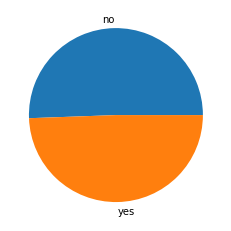

In [67]:
plt.rcParams['figure.figsize'] = [5, 4]
activities_counts = df_corr['activities'].value_counts()
plt.pie(activities_counts, normalize=True, labels = activities_counts.index)
plt.show()

In [68]:
df_corr['activities'] = df_corr['activities'].astype('category').cat.codes
activities_corr = df_corr[['activities', 'G3']].corr()['G3'].loc['activities']
print('Correlation between participation in extra-curricular activities and final grade: ', activities_corr)

Correlation between participation in extra-curricular activities and final grade:  0.03399837127114887


There is very little correlation between participation in extra-curricular activites and the student's performance. 

#### Attended nursery school

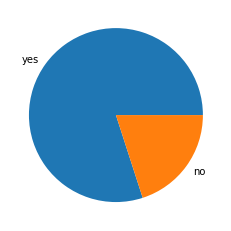

In [69]:
plt.rcParams['figure.figsize'] = [5, 4]
nursery_counts = df_corr['nursery'].value_counts()
plt.pie(nursery_counts, normalize=True, labels = nursery_counts.index)
plt.show()

In [70]:
df_corr['nursery'] = df_corr['nursery'].astype('category').cat.codes
nursery_corr = df_corr[['nursery', 'G3']].corr()['G3'].loc['nursery']
print('Correlation between attendance in nursery school and final grade: ', nursery_corr)

Correlation between attendance in nursery school and final grade:  0.03994955915651345


#### Intends to attend higher education

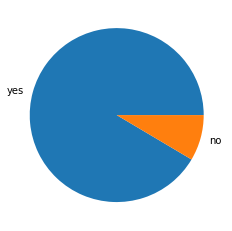

In [71]:
plt.rcParams['figure.figsize'] = [5, 4]
higher_counts = df_corr['higher'].value_counts()
plt.pie(higher_counts, normalize=True, labels = higher_counts.index)
plt.show()

Interestingly, almost all of the students in the survey intended to attend higher education. 

In [72]:
df_corr['higher'] = df_corr['higher'].astype('category').cat.codes
higher_corr = df_corr[['higher', 'G3']].corr()['G3'].loc['higher']
print('Correlation between desire to attend higher education and final grade: ', higher_corr)

Correlation between desire to attend higher education and final grade:  0.2365779956649263


A weak postitive correlation exists between the intention to attend higher education and student performance. This matches what we had predicted. Students who want to attend further education are going to be more motivated in school than students who have no desire to attend higher education. In addition, students who are already doing poorly in school may make the decision to not pursue higher education based on their current struggles in school. 

#### Internet access at home

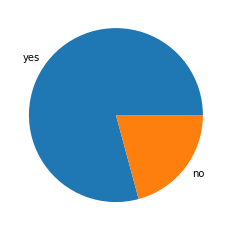

In [73]:
plt.rcParams['figure.figsize'] = [5, 4]
internet_counts = df_corr['internet'].value_counts()
plt.pie(internet_counts, normalize=True, labels = internet_counts.index)
plt.show()

In [74]:
df_corr['internet'] = df_corr['internet'].astype('category').cat.codes
internet_corr = df_corr[['internet', 'G3']].corr()['G3'].loc['internet']
print('Correlation between internet access and final grade: ', internet_corr)

Correlation between internet access and final grade:  0.10706388402496843


There is a weak positive correlation between internet access and grades. This is about what we had expected. We hypothesized that it would be harder to achieve good grades without internet access at home, since students would either need to travel to a place with public internet or be unable to leverage online resources altogether. This dataset was collected in 2006 when most work was completed and submitted on paper. In today's educational environment where everything is done online, being successful without internet at home would be even more challenging. 

#### In a romantic relationship

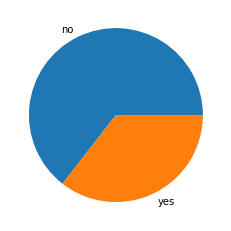

In [75]:
plt.rcParams['figure.figsize'] = [5, 4]
romantic_counts = df_corr['romantic'].value_counts()
plt.pie(romantic_counts, normalize=True, labels = romantic_counts.index)
plt.show()

In [76]:
df_corr['romantic'] = df_corr['romantic'].astype('category').cat.codes
romantic_corr = df_corr[['romantic', 'G3']].corr()['G3'].loc['romantic']
print('Correlation between being in a romantic relationship and final grade: ', romantic_corr)

Correlation between being in a romantic relationship and final grade:  -0.09836301617445385


There is a weak negative correlation between being in a romantic relationship and student performance.

#### Quality of family relationships

from 1 - very bad to 5 - excellent

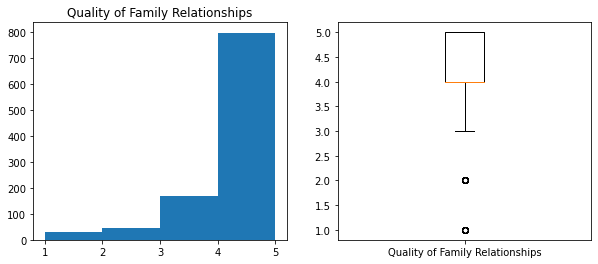

In [85]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.subplot(1, 2, 1)
plt.title('Quality of Family Relationships')
plt.hist(df_corr['famrel'], bins=[*range(1, 6)])
plt.subplot(1, 2, 2)
plt.boxplot(df_corr['famrel'], labels=['Quality of Family Relationships'])
plt.show()

The distribution of quality of family relationships appears to be non-Gaussian. Therefore, we will calculate the Spearman correlation between this attribute and final grade.

In [95]:
famrel_corr = df_corr[['famrel', 'G3']].corr(method='spearman')['G3'].loc['famrel']
print('Correlation between quality of family relationships and final grade: ', famrel_corr)

Correlation between quality of family relationships and final grade:  0.04938760906724494


#### Free time

from 1 - very low to 5 - very high

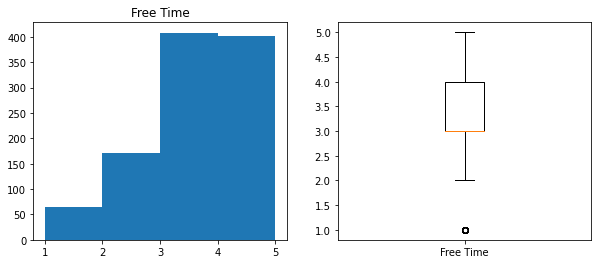

In [89]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.subplot(1, 2, 1)
plt.title('Free Time')
plt.hist(df_corr['freetime'], bins=[*range(1, 6)])
plt.subplot(1, 2, 2)
plt.boxplot(df_corr['freetime'], labels=['Free Time'])
plt.show()

The distribution of the free time attribute appears to be non-Gaussian. Therefore, we will calculate the Spearman correlation between free time and final grade.

In [94]:
freetime_corr = df_corr[['freetime', 'G3']].corr(method='spearman')['G3'].loc['freetime']
print('Correlation between free time and final grade: ', freetime_corr)

Correlation between free time and final grade:  -0.08182727632579963


#### Going out with friends

from 1 - very low to 5 - very high

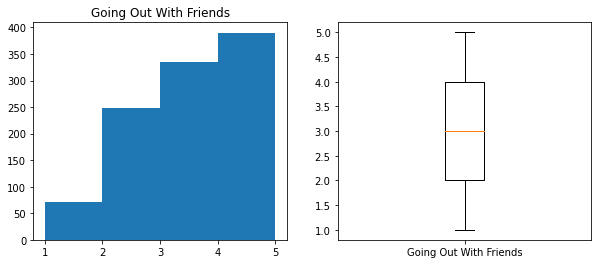

In [91]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.subplot(1, 2, 1)
plt.title('Going Out With Friends')
plt.hist(df_corr['goout'], bins=[*range(1, 6)])
plt.subplot(1, 2, 2)
plt.boxplot(df_corr['goout'], labels=['Going Out With Friends'])
plt.show()

The distribution of the going out attribute appears to be non-Gaussian. Therefore, we will calculate the Spearman correlation between this attribute and final grade.

In [118]:
goout_corr = df_corr[['goout', 'G3']].corr(method='spearman')['G3'].loc['goout']
print('Correlation between going out with friends and final grade: ', goout_corr)

Correlation between going out with friends and final grade:  -0.12009742541115494


#### Weekday alcohol consumption

from 1 - very low to 5 - very high

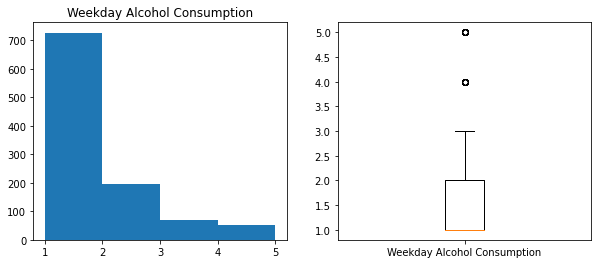

In [119]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.subplot(1, 2, 1)
plt.title('Weekday Alcohol Consumption')
plt.hist(df_corr['Dalc'], bins=[*range(1, 6)])
plt.subplot(1, 2, 2)
plt.boxplot(df_corr['Dalc'], labels=['Weekday Alcohol Consumption'])
plt.show()

The distribution of the weekday alcohol consumption attribute appears to be non-Gaussian. Therefore, we will calculate the Spearman correlation between this attribute and final grade.

In [120]:
dalc_corr = df_corr[['Dalc', 'G3']].corr(method='spearman')['G3'].loc['Dalc']
print('Correlation between weekday alcohol consumption and final grade: ', dalc_corr)

Correlation between weekday alcohol consumption and final grade:  -0.17187856405688476


#### Weekend alcohol consumption

from 1 - very low to 5 - very high

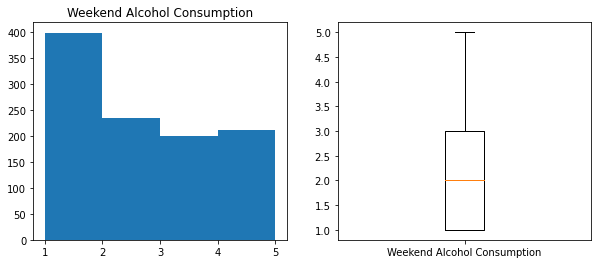

In [121]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.subplot(1, 2, 1)
plt.title('Weekend Alcohol Consumption')
plt.hist(df_corr['Walc'], bins=[*range(1, 6)])
plt.subplot(1, 2, 2)
plt.boxplot(df_corr['Walc'], labels=['Weekend Alcohol Consumption'])
plt.show()

The distribution of the weekend alcohol consumption attribute appears to be non-Gaussian. Therefore, we will calculate the Spearman correlation between this attribute and final grade.

In [122]:
walc_corr = df_corr[['Walc', 'G3']].corr(method='spearman')['G3'].loc['Walc']
print('Correlation between weekend alcohol consumption and final grade: ', walc_corr)

Correlation between weekend alcohol consumption and final grade:  -0.1493296562947421


#### Health

from 1 - very bad to 5 - very good

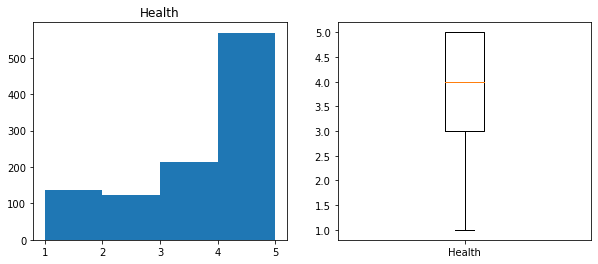

In [123]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.subplot(1, 2, 1)
plt.title('Health')
plt.hist(df_corr['health'], bins=[*range(1, 6)])
plt.subplot(1, 2, 2)
plt.boxplot(df_corr['health'], labels=['Health'])
plt.show()

The distribution of the health attribute appears to be non-Gaussian. Therefore, we will calculate the Spearman correlation between this attribute and final grade.

In [124]:
health_corr = df_corr[['health', 'G3']].corr(method='spearman')['G3'].loc['health']
print('Correlation between health and final grade: ', health_corr)

Correlation between health and final grade:  -0.08078521444471097


#### Absences

from 0 to 93

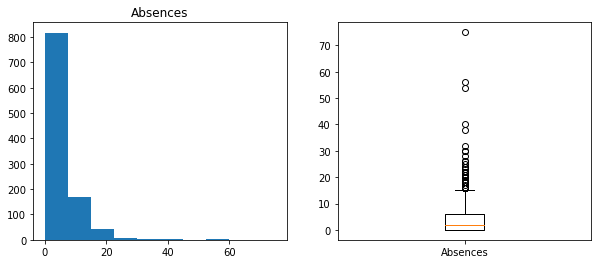

In [125]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.subplot(1, 2, 1)
plt.title('Absences')
plt.hist(df_corr['absences'])
plt.subplot(1, 2, 2)
plt.boxplot(df_corr['absences'], labels=['Absences'])
plt.show()

The distribution of the absences attribute appears to be non-Gaussian. Therefore, we will calculate the Spearman correlation between this attribute and final grade.

In [126]:
absences_corr = df_corr[['absences', 'G3']].corr(method='spearman')['G3'].loc['absences']
print('Correlation between absences and final grade: ', absences_corr)

Correlation between absences and final grade:  -0.10897236400308521


### Correlation between attributes

In [174]:
categorical_cols = df_corr.dtypes[df_corr.dtypes == 'object']
categorical_cols

famsize       object
Pstatus       object
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
dtype: object

In [175]:
for col, dtype in categorical_cols.iteritems():
    df_corr[col] = df_corr[col].astype('category').cat.codes

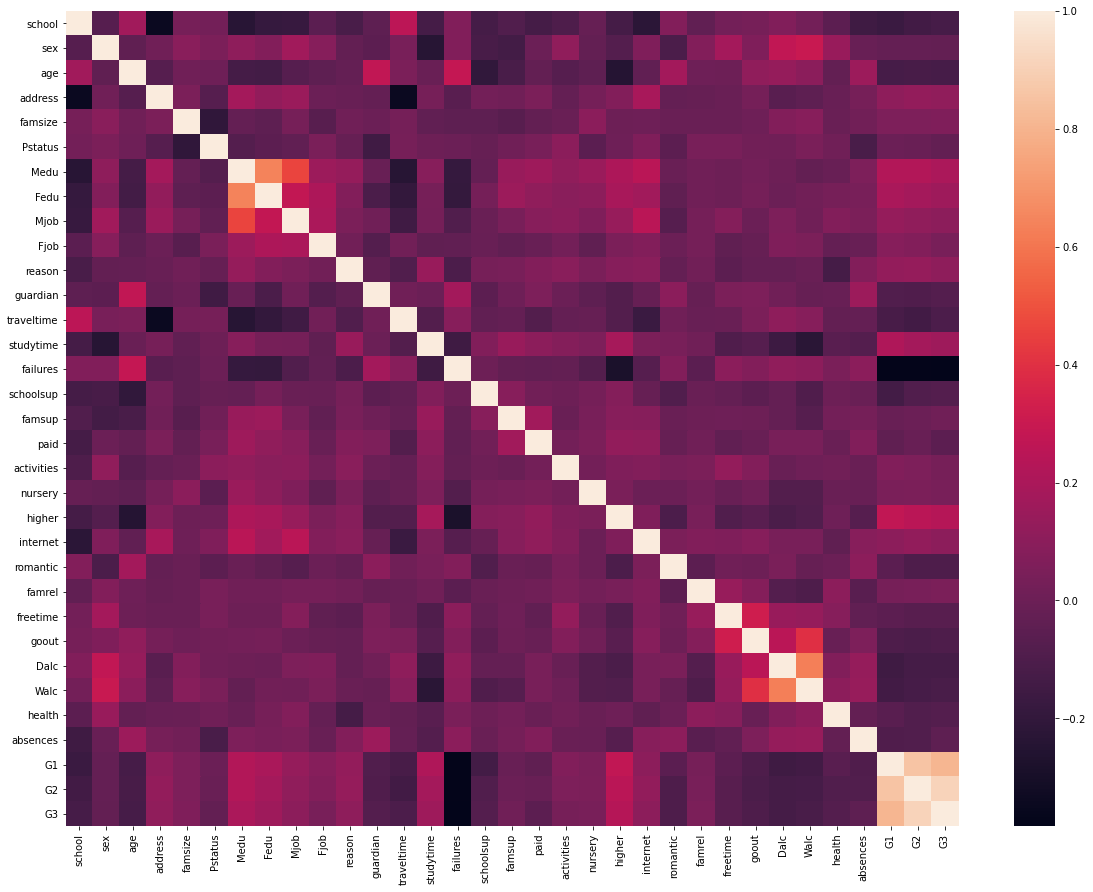

In [176]:
corr = df_corr.corr()
plt.rcParams['figure.figsize'] = [20, 15]
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

From these correlation heatmaps, we can make several observations:
- There is a negative correlation between number of past failed classes and the desire to participate in higher education.
- There is a strong positive correlation between family educational support and whether or not the student participated in extra paid classes for that particular subject.
- There is a negative correlation between parent education and past failed classes.
- There is a negative correlation between both workday and weekend alcohol consumption and studytime.
- There is a strong positive correlation between workday and weekend alcohol consumption. This may be an indicator of multicollinearity. We plan on removing one of these attributes (most likely weekend alcohol consumption because there was a smaller correlation with final grades).
- There is a strong positive correlation (~0.7) between mother education and father education. There is a slightly weaker correlation (~0.4-0.5) correlation with the parent job types attribute as well. This may be another indicator of multicollinearity and as a result, we are planning on removing one or more of these attributes.
- There is a positive correlation between free time and going out with friends.